# *Do we need One Hot Encoding ?*


In [2]:
import pandas as pd
import numpy as np 
import glob
from scipy.spatial import distance
import seaborn as sns
from sklearn.metrics import DistanceMetric
from scipy.stats import zscore
import scipy as stats
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

In [3]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [4]:
#data = pd.read_csv(r'income_dataset/*.csv')
data = pd.concat(map(pd.read_csv, glob.glob('income_dataset/*.csv')))
data1=data.copy()
print(data.shape)
#data.isna().sum()
data1.dropna(inplace=True)
print(data1.shape)
for col in data1.columns :
    print("Unique values for ", col , ": ", data1[col].nunique(),"----type :", data1[col].dtype )
"""
fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the
civilian noninstitutional population of the US. 
These are prepared monthly for us by Population Division here at the Census Bureau.
    
"""


(44856, 15)
(40727, 15)
Unique values for  age :  74 ----type : int64
Unique values for  workclass :  7 ----type : object
Unique values for  fnlwgt :  24985 ----type : int64
Unique values for  education :  16 ----type : object
Unique values for  educational-num :  16 ----type : int64
Unique values for  marital-status :  7 ----type : object
Unique values for  occupation :  14 ----type : object
Unique values for  relationship :  6 ----type : object
Unique values for  race :  5 ----type : object
Unique values for  gender :  2 ----type : object
Unique values for  capital-gain :  120 ----type : int64
Unique values for  capital-loss :  95 ----type : int64
Unique values for  hours-per-week :  94 ----type : int64
Unique values for  native-country :  41 ----type : object
Unique values for  income_>50K :  2 ----type : float64


'\nfnlwgt: final weight, continuous.\nThe weights on the CPS files are controlled to independent estimates of the\ncivilian noninstitutional population of the US. \nThese are prepared monthly for us by Population Division here at the Census Bureau.\n    \n'

In [5]:
df1=data1[['hours-per-week','fnlwgt','age','marital-status','gender','income_>50K' ]]
df=pd.get_dummies(df1,drop_first=True)

In [6]:
data=df.head(10).reset_index(drop=True)
data

,hours-per-week,fnlwgt,age,income_>50K,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,gender_Male
0,60,366425,67,1.0,0,0,0,0,0,0,1
1,15,244602,17,0.0,0,0,0,1,0,0,1
2,40,174201,31,1.0,0,1,0,0,0,0,1
3,40,110199,58,0.0,0,1,0,0,0,0,1
4,40,149248,25,0.0,0,0,0,1,0,0,1
5,40,105363,59,0.0,0,0,0,1,0,0,1
6,40,216390,70,0.0,0,1,0,0,0,0,0
7,60,361888,35,0.0,0,1,0,0,0,0,1
8,50,74784,28,0.0,0,0,0,1,0,0,1
9,45,118089,28,1.0,0,1,0,0,0,0,1


In [7]:
# two columns to measure dis
in_col=['gender_Male','marital-status_Never-married']
num_col=['age','hours-per-week']

# Categorical Data

## Euclidean distance 
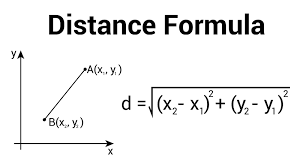

In [8]:
data[in_col].T

,0,1,2,3,4,5,6,7,8,9
gender_Male,1,1,1,1,1,1,0,1,1,1
marital-status_Never-married,0,1,0,0,1,1,0,0,1,0


<AxesSubplot: >

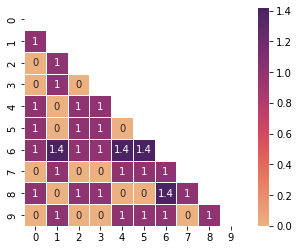

In [9]:
dist = DistanceMetric.get_metric('euclidean')
euclid=pd.DataFrame(dist.pairwise(data[in_col],data[in_col]))
sns.heatmap(euclid,annot=True,mask=np.triu(np.ones(euclid.shape)),cmap='flare', xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.5,)

## Hamming distance 
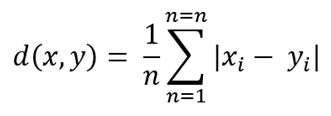


<AxesSubplot: >

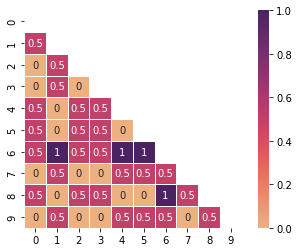

In [10]:
dist_hamming = DistanceMetric.get_metric('hamming')
hamming=pd.DataFrame(dist_hamming.pairwise(data[in_col],data[in_col]))
sns.heatmap(hamming,annot=True,cmap='flare', mask=np.triu(np.ones(hamming.shape)),xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.5)

## Observation 
Hamming and Euclidean distances have similar results for binary data. Therefore, by converting categorical feature to one-hot encoding we can calculate the distance of numerical and categorical data.

### Jaccard Distance
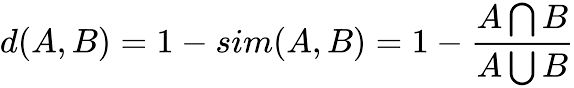

<AxesSubplot: >

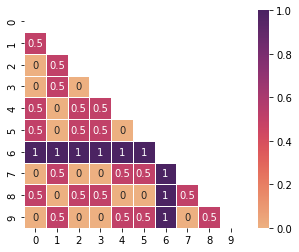

In [11]:
dist_jacc = DistanceMetric.get_metric('jaccard')
jaccard=pd.DataFrame(dist_jacc.pairwise(data[in_col],data[in_col]))
sns.heatmap(jaccard,annot=True,cmap='flare', mask=np.triu(np.ones(jaccard.shape)),xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.5)

### Cosine Distance 
### Cosine distance= 1- cosine similarity.
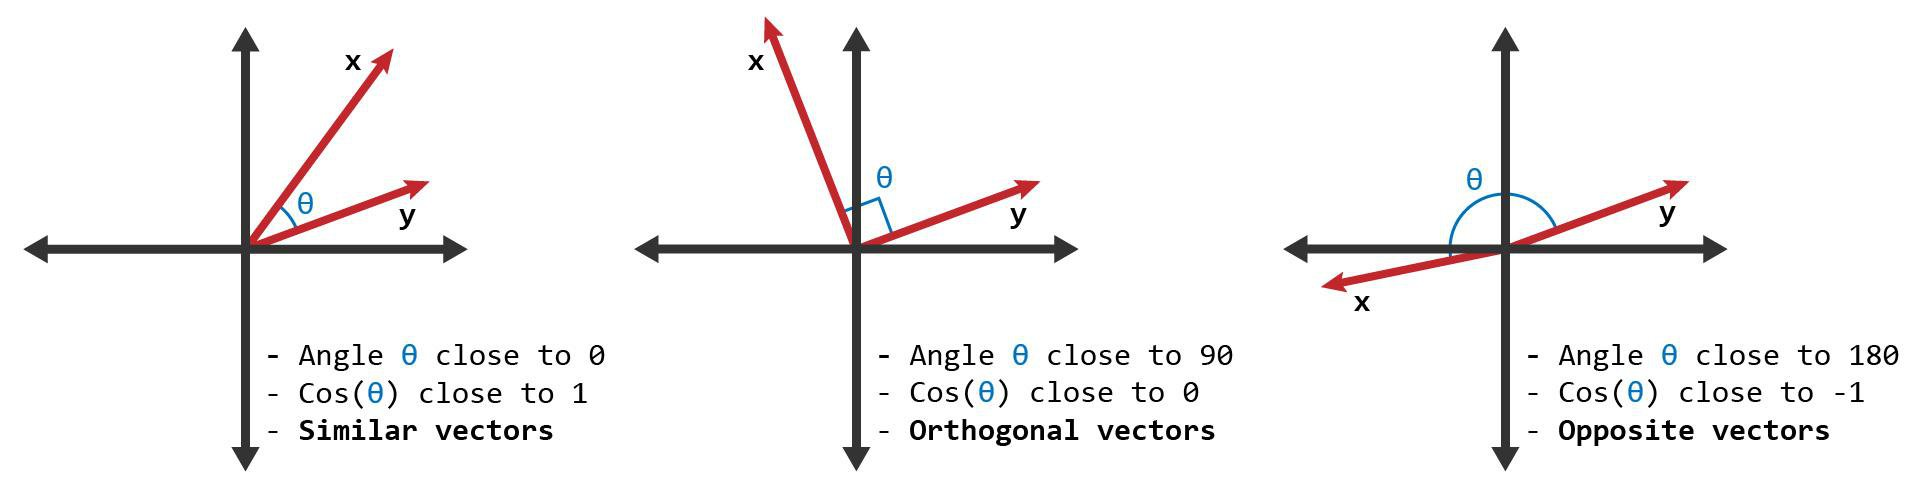

<AxesSubplot: >

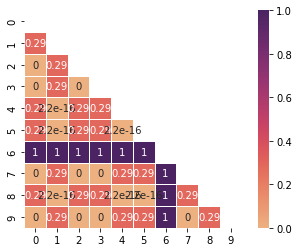

In [12]:

from sklearn import metrics
cosine=pd.DataFrame(metrics.pairwise.cosine_distances(data[in_col]))
sns.heatmap(cosine,annot=True,cmap='flare', mask=np.triu(np.ones(cosine.shape)),xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.5)

# Numerical Data 

### Euclidean distance 

<AxesSubplot: >

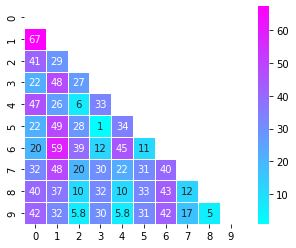

In [13]:
dist = DistanceMetric.get_metric('euclidean')
euclid=pd.DataFrame(dist.pairwise(data[num_col],data[num_col]))
sns.heatmap(euclid,annot=True,mask=np.triu(np.ones(euclid.shape)),cmap='cool', xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.5,)

<AxesSubplot: >

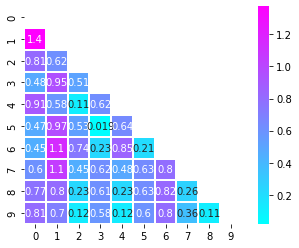

In [14]:
#min-max scaling 
minmax=lambda df: (df-df.min())/(df.max()-df.min())
euclid=pd.DataFrame(dist.pairwise(data[num_col].apply(minmax),data[num_col].apply(minmax)))
sns.heatmap(euclid,annot=True,mask=np.triu(np.ones(euclid.shape)),cmap='cool', xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.3)

<AxesSubplot: >

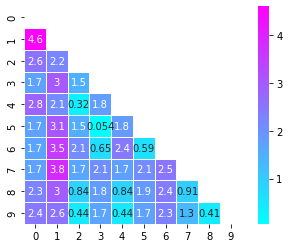

In [15]:
#standard scaling
euclid=pd.DataFrame(dist.pairwise(data[num_col].apply(zscore),data[num_col].apply(zscore)))
sns.heatmap(euclid,annot=True,mask=np.triu(np.ones(euclid.shape)),cmap='cool', xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.5,)

### Mahalanobis distance

In [16]:
data_md=data[['age','hours-per-week','gender_Male','income_>50K']]
def calculateMahalanobis(y=None, data=None, cov=None):
  
    y_mu = y - data.mean()
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()
  
data_md['Mahalanobis'] = calculateMahalanobis(y=data_md, data=data_md)
a=0.05
# calculate p-value for each mahalanobis distance
data_md['p'] = 1 - chi2.cdf(data_md['Mahalanobis'], 3)
data_md['Anomalies']=data_md['p'].apply(lambda x: 'Outlier' if x <= a else 'Data')
# display first five rows of dataframe
print(data_md)

   age  hours-per-week  gender_Male  income_>50K  Mahalanobis         p  \
0   67              60            1          1.0     4.464749  0.215456   
1   17              15            1          0.0     5.182938  0.158881   
2   31              40            1          1.0     2.728720  0.435369   
3   58              40            1          0.0     2.666461  0.445957   
4   25              40            1          0.0     1.194797  0.754252   
5   59              40            1          0.0     2.862730  0.413277   
6   70              40            0          0.0     8.100000  0.043990   
7   35              60            1          0.0     3.880666  0.274642   
8   28              50            1          0.0     2.101126  0.551685   
9   28              45            1          1.0     2.817814  0.420576   

  Anomalies  
0      Data  
1      Data  
2      Data  
3      Data  
4      Data  
5      Data  
6   Outlier  
7      Data  
8      Data  
9      Data  


<AxesSubplot: xlabel='age', ylabel='hours-per-week'>

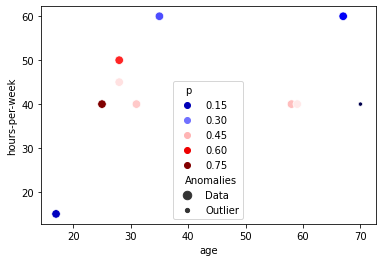

In [17]:
sns.scatterplot(data=data_md,x='age',y='hours-per-week',hue='p',size='Anomalies',palette='seismic')

# Tree Based Models 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import DistanceMetric,f1_score,confusion_matrix,precision_score, recall_score 
from sklearn.metrics import accuracy_score , classification_report, balanced_accuracy_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier

In [19]:
X = data1.drop('income_>50K', axis =1)
y = data1['income_>50K'].replace({})

In [20]:
data1['income_>50K'].value_counts(normalize=True)

0.0    0.752204
1.0    0.247796
Name: income_>50K, dtype: float64

## Encoding models 

In [21]:
import category_encoders as ce
col=['race','gender','relationship', 'occupation', 'workclass','native-country','marital-status', 'education']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,stratify=y)

In [22]:
dt_t=RandomForestClassifier(max_depth=3,random_state=1,class_weight='balanced'
                            )
Onehotencoder=  ce.OneHotEncoder(cols=col)
Targetencoder= ce.TargetEncoder(cols=col)
Ordinalencoder=ce.OrdinalEncoder(cols=col)
Countencoder=ce.CountEncoder(cols=col)
all_encoding=pd.DataFrame()
ind=[]
for i,encoder in enumerate([Onehotencoder,Targetencoder,Ordinalencoder,Countencoder]):
    train_en = encoder.fit_transform(X_train, y_train)
    test_en = encoder.transform(X_test)
    dt_t.fit(train_en, y_train)
    ecoding_train=model_performance_classification_sklearn(dt_t,train_en,y_train)
    ecoding_test=model_performance_classification_sklearn(dt_t,test_en,y_test)
    all_encoding=pd.concat([all_encoding,ecoding_train,ecoding_test])
    index=ind.extend([f'{type(encoder).__name__}_train',f'{type(encoder).__name__}_test'])
    

In [23]:
all_encoding.index=ind
all_encoding

,Accuracy,Recall,Precision,F1
OneHotEncoder_train,0.730234,0.843705,0.475043,0.607843
OneHotEncoder_test,0.730505,0.838684,0.475185,0.606651
TargetEncoder_train,0.744312,0.876206,0.491077,0.629401
TargetEncoder_test,0.746808,0.881887,0.493896,0.633182
OrdinalEncoder_train,0.743722,0.869071,0.490347,0.626954
OrdinalEncoder_test,0.744058,0.868014,0.490701,0.626968
CountEncoder_train,0.741136,0.875281,0.487563,0.626270
CountEncoder_test,0.742389,0.873563,0.488909,0.626938


<AxesSubplot: >

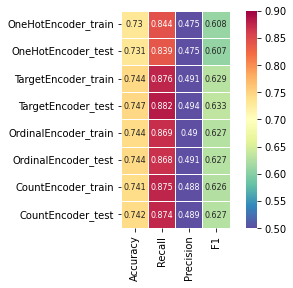

In [24]:
sns.heatmap(all_encoding,square=True,linecolor='white',linewidths=0.5,annot=True,vmin=0.5,vmax=0.9,cmap='Spectral_r',fmt='0.03',annot_kws={'fontsize':8})

## Observation: 
No difference in metrics based on the encoding method we used. 